In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_00 = '00/exercise_0_introduction/resources'

file = 'umah.jpeg'  ## path to the image
input_path = os.path.join(root, res_00, file)
img = cv2.imread(input_path, cv2.IMREAD_COLOR)
img_array = np.array(img) 

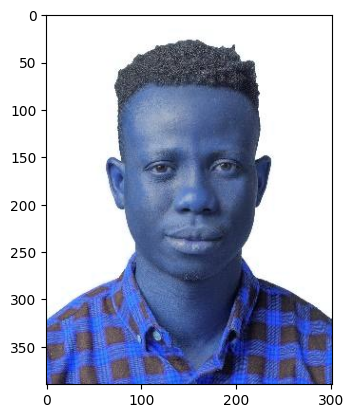

In [3]:
plt.imshow(img_array)

In [9]:
img_array.shape[:2]

(390, 302)

In [10]:
def scale_down(image: np.array) -> np.array:
    """Returns an image half the size of the original.

    Args:
        image: A numpy array with an opencv image

    Returns:
        A numpy array with an opencv image half the size of the original image
    """
    height, width = image.shape[:2]
    scaled_down_img = cv2.resize(image, (height//2, width//2))
    #print("SHAPE_SCALED:", scale_down.shape)
    return scaled_down_img

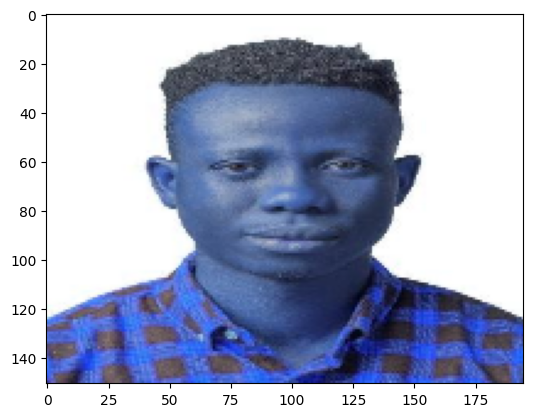

In [11]:
scaled_img = scale_down(img_array)
plt.imshow(scaled_img)

In [13]:
scaled_img.shape, img_array.shape

((151, 195, 3), (390, 302, 3))

In [21]:
def separate_channels(colored_image: np.array):
    """Takes an BGR color image and splits it three images.

    Args:
        colored_image: an numpy array sized [HxWxC] where the channels are in BGR (Blue, Green, Red) order

    Returns:
        A tuple with three BGR images the first one containing only the Blue channel active, the second one only the
        green, and the third one only the red.
    """
    # OpenCV BGR 
    # vs RGB
    blue = green = red =  colored_image

    print("BLUE: ", blue.shape)
    print("GREEN: ", green.shape)
    print("RED: ", red.shape)


    
    blue[:,:,1] = blue[:,:,2] = 0 
    
    green[:,:,0] = green[:,:,2] = 0 
    
    red[:,:,0] = red[:,:,1] = 0 
    
    return (blue, green, red)

In [22]:
sep_img = separate_channels(img_array)


BLUE:  (390, 302, 3)
GREEN:  (390, 302, 3)
RED:  (390, 302, 3)


In [36]:
len(sep_img)

3

In [ ]:
# Exer 02 Bug fix

def detect_corners(R: np.array, threshold: float = 0.1) -> Tuple[np.array, np.array]:
    """Computes key-points from a Harris response image.

    Key points are all points where the harris response is significant and greater than its neighbors.

    Args:
        R: A float image with the harris response
        threshold: A float determining which Harris response values are significant.

    Returns:
        A tuple of two 1D integer arrays containing the x and y coordinates of key-points in the image.
    """
    # Step 1 (recommended): Pad the response image to facilitate vectorization
    corners = np.zeros(R.shape[:2], dtype=bool)  # Only 2D array needed for corner detection

    # Get the shape of the Harris response function
    rows, cols = R.shape

    # Iterate over each pixel in R
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check the threshold for all channels
            pixel_values = R[i, j]
            if np.all(pixel_values > threshold):
                # Extract the 3x3 neighborhood for each channel
                neighborhood = R[i-1:i+2, j-1:j+2]
                
                # Check if the current pixel is a local maximum across all channels
                if np.all(pixel_values == np.max(neighborhood, axis=(0, 1))):
                    corners[i, j] = True

    # Get the coordinates of the detected corners
    



    # Step 2 (recommended): Create one image for every offset in the 3x3 neighborhood


    # Step 3 (recommended): Compute the greatest neighbor of every pixel


    # Step 4 (recommended): Compute a boolean image with only all key-points set to True


    # Step 5 (recommended): Use np.nonzero to compute the locations of the key-points from the boolean image
    y_coords, x_coords = np.nonzero(corners)

    return (y_coords, x_coords)
